# Alcohol Consumption in Russia

![Alcoholic Beverages in Russia](images/drinks.png)
            Source: [The Russian alcohol market: a heady cocktail](http://www.food-exhibitions.com/Market-Insights/Russia/The-Russian-alcohol-market)

## Project Motivation

A fictitious company based in Russia owns a chain of stores that sell a  variety of alcohol. A recent wine promotion in Saint Petersburg has incentivized the company to run the same across other regions. Due to cost considerations, management has decided to limit the promotion to only ten regions with similar buying habits to Saint Peterburg with the expectation of similar success in sales.

![Regions in Russia](images/regions.png)
        Source: [Outline of Russia](https://en.wikipedia.org/wiki/Outline_of_Russia)
        
This project will use a machine-learning algorithm to recommend at least ten regions with similar buying habits to Saint Petersburg.

## The Dataset

The data used in this project is obtained from [Datacamp's Career Hub repository](https://github.com/datacamp/careerhub-data) on GitHub. It contains 7 variables as seen in the description below:

![Description of dataset](images/data_description.png)

## Analysis Plan

Based on the ask of the project, the problem is best solved using a Collaborative Filtering Recommender System to recommend regions based on similarity scores. 

We will follow the below steps to perform the analysis:

- Perform Exploratory Data Analysis to identify patterns and draw insights from the data.
- Implement a Collaborative Filtering algorithm to make recommendations.

### Exploratory Data Analysis

This section will explore the data to discover trends and insights. We will follow the below steps:

- Read data
- Check for data quality issues.
- Clean and transform data into a suitable format for exploration.
- Data Visualization to observe patterns and trends.

In [16]:
# import system and exploratory analysis modules
import platform; print(platform.platform())
import sys; print("Python", sys.version)
import numpy as np; print("Numpy", np.__version__)
import matplotlib; print("Matplotlib", matplotlib.__version__)
import matplotlib.pyplot as plt
import pandas as pd; print("Pandas", pd.__version__)
import seaborn as sns; print("Seaborn", sns.__version__)
import scipy; print("Scipy", scipy.__version__)
import sklearn; print("Scikit -Learn", sklearn.__version__)
import funcs

Windows-10-10.0.19041-SP0
Python 3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
Numpy 1.19.2
Matplotlib 3.3.2
Pandas 1.1.5
Seaborn 0.11.1
Scipy 1.5.2
Scikit -Learn 0.23.2


### Read and check data for quality issues

We will use read_data, a function in funcs.py to do the following:

- Read the data
- Drop duplicates
- Create a list of feature names
- Create a containing data types and nulls.

In [3]:
# path to data
path = 'alcohol-consumption-in-russia.csv'

In [17]:
# extract Beverage DataFrame and Nulls DataFrame
df, df_cols, df_nulls = funcs.read_data(path)

Making a copy of the dataframe

Data consists of:

...........................

Rows: 1615

Columns: 7

...........................

Extracting count and percentages of nulls and non nulls


In [5]:
# inspect first 5 rows of data
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [6]:
# check for quality issues in data
df_nulls

,Feature,DataType,CountOfNonNulls,CountOfNulls,PercentOfNullsIinColumn,PercentOfNullsInData
0,year,int64,1615,0,0.000000,0.000000
1,region,object,1615,0,0.000000,0.000000
2,wine,float64,1552,63,3.900929,20.257235
3,beer,float64,1557,58,3.591331,18.649518
4,vodka,float64,1554,61,3.777090,19.614148
5,champagne,float64,1552,63,3.900929,20.257235
6,brandy,float64,1549,66,4.086687,21.221865


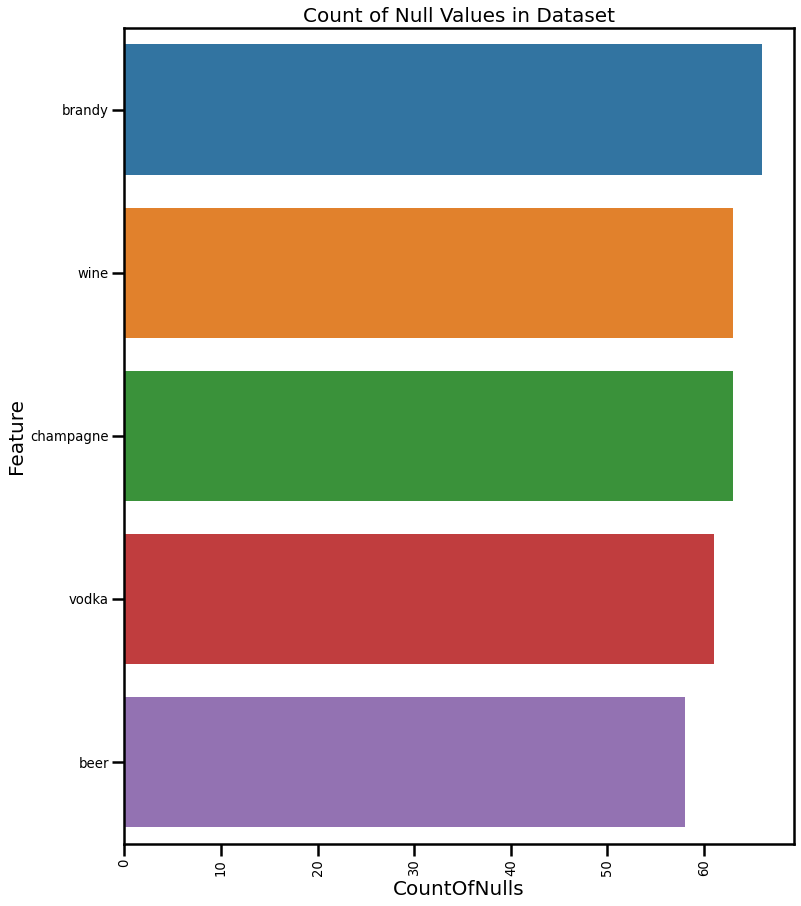

In [13]:
# plot null counts
funcs.plot_nulls(df_nulls)

In [8]:
# summary statistics for numerical features
df.describe()

,year,wine,beer,vodka,champagne,brandy
count,1615.000000,1552.000000,1557.000000,1554.000000,1552.000000,1549.000000
mean,2007.000000,5.628144,51.260148,11.818694,1.313177,0.526998
std,5.478922,2.813208,25.372821,5.128806,0.797956,0.400201
min,1998.000000,0.100000,0.400000,0.050000,0.100000,0.000000
25%,2002.000000,3.575000,32.400000,8.300000,0.800000,0.200000
50%,2007.000000,5.400000,49.970000,11.500000,1.200000,0.400000
75%,2012.000000,7.377500,67.400000,15.000000,1.665000,0.700000
max,2016.000000,18.100000,207.300000,40.600000,5.560000,2.300000


In [20]:
# summary statistics for categorical feature
df.describe(exclude = 'number')

,region
count,1615
unique,85
top,Primorsky Krai
freq,19


In [21]:
# checking unique values of region
df['region'].value_counts()

Primorsky Krai                      19
Sakha (Yakutia) Republic            19
Vladimir Oblast                     19
Jewish Autonomous Oblast            19
Sakhalin Oblast                     19
                                    ..
Republic of North Ossetia-Alania    19
Altai Republic                      19
Volgograd Oblast                    19
Irkutsk Oblast                      19
Tula Oblast                         19
Name: region, Length: 85, dtype: int64

As can be observed above, the dataset consists of 1615 rows and 7 columns. Region is the only column of type object. Also, we can tell that there are missing values in all the columns containing data of the alcoholic beverages. Notably, Brandy has the most missing values, about 21.2% of total nulls in data. We will handle missing values in the cleaning and transformation sections. 

The summary statistics gave us an overview of basic statistical properties. We can tell that the data contains sales per capita records from the 2002 to 1998. There are 85 regions covered and they all have the same counts.

### Clean and Transform Data

The data is relatively clean based on our observation from the inspection section. We will handle missing values by imputing the mean in each beverage column and strip leading and trailing spaces in the region column.

The clean_and_transform function in funcs.py will perform the cleaning and transformation processes stated above.

In [10]:
# clean and transform data
df_clean = funcs.clean_and_transform(df)

In [11]:
# inspect data again for quality issues
df_clean.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998-01-01,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998-01-01,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998-01-01,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998-01-01,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998-01-01,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


### Visualizations

Visualizing the data will aid in identifying patterns and relationships among the features. For this project, we will create the following plots:
- Time series of sales data.
- Regional Sales.
- Correlation of numerical features.

As in previous sections, we will use functions found in funcs.py to create various plots, including time series, bar, box, and correlation plots.

#### Time Series Analysis

For brevity, we will look at the following time series analysis:

- Mean sales per capita of all beverages.
- Wine sales in all regions.
- Wine sales in Saint Petersburg.

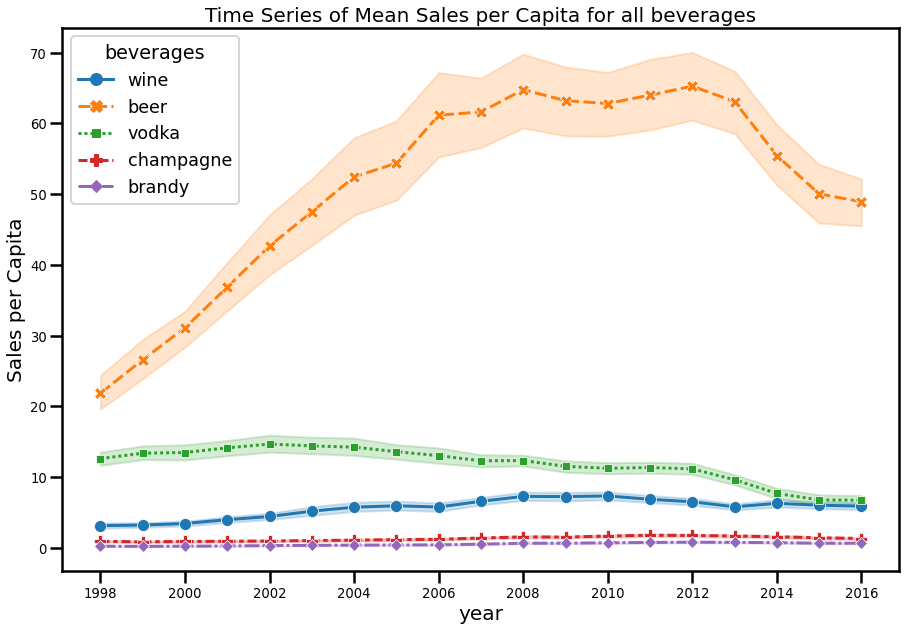

In [14]:
# Time series beverage sales
funcs.plot_timeseries(df_clean)

The time series plot above indicates that beer had the highest sales year over year even though sales decreased from 2012 to 2015. On the other hand, our product of interest, wine, saw a gradual increase in sales starting from 2002. Vodka also experienced a gradual drop in sales. There is minimal sales increase for champagne and brandy.

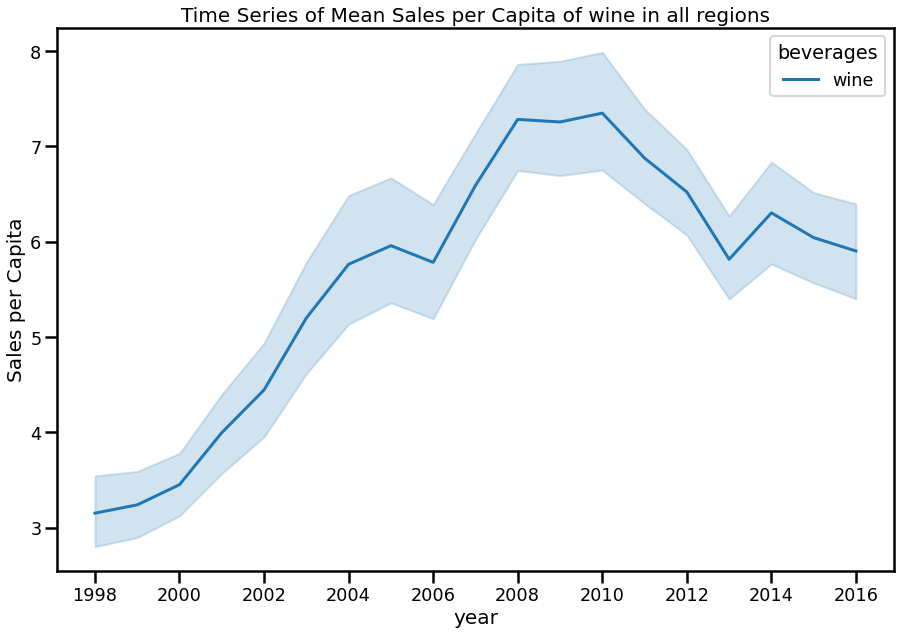

In [27]:
# time series for wine sales in all regions
funcs.plot_timeseries(df_clean, beverage = 'wine')

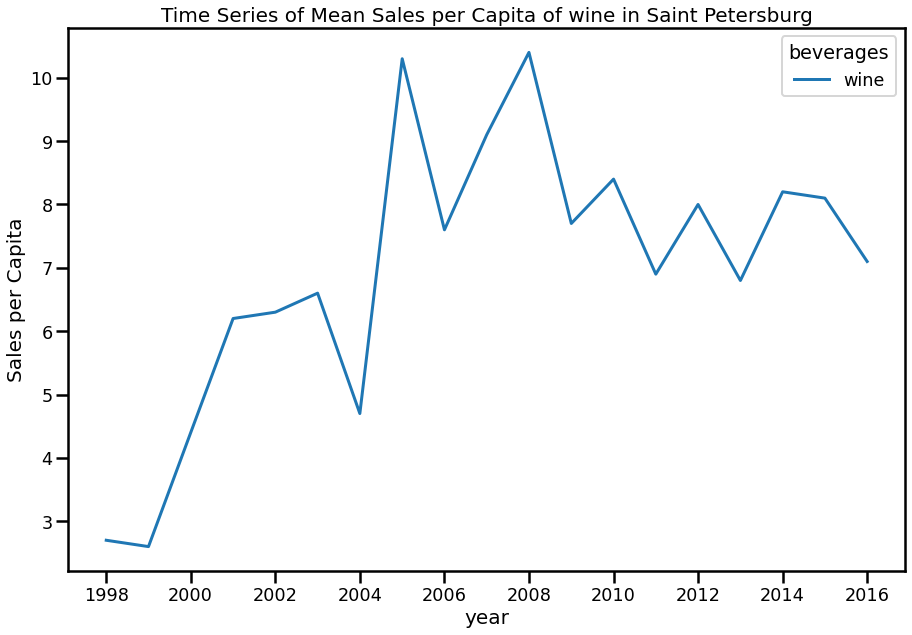

In [24]:
# time series of wine sales in Saint Petrsburg
funcs.plot_timeseries(df_clean, sales_region = 'Saint Petersburg', beverage = 'wine')

Sales in Saint Petersburg follow the same trend as combined regions. Zooming in on wine, we can see a leap between 2004 and 2005 followed by fluctuating sales up to 2015.

#### Distribution of Beverage Sales

We will create a box plot to see the spread of the sales data per beverage across all regions.

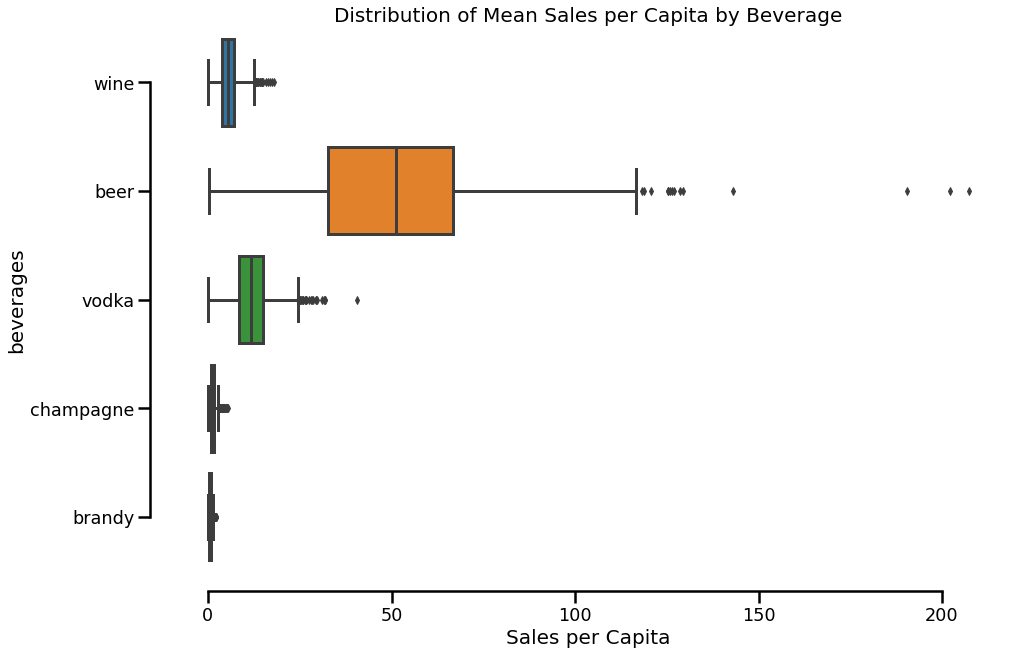

In [28]:
# boxplot to observe distribution of sales across regions
funcs.box_plot(df_clean)

We can observe how beer sales significantly outperform other beverages. Is it more popular or costs less? There are even higher sales in some regions, reaching up to 200USD Mean Sales. On the other hand, Champagne and Brandy have the least spread and very low Mean Sales. Wine sales follow a similar trend with values between 0 and 25USD Mean Sales.

#### Regional Sales Rank

We will create barplots to have a glimpse of regional performance on Mean Sales per capita of 

- all beverages and 
- wine.

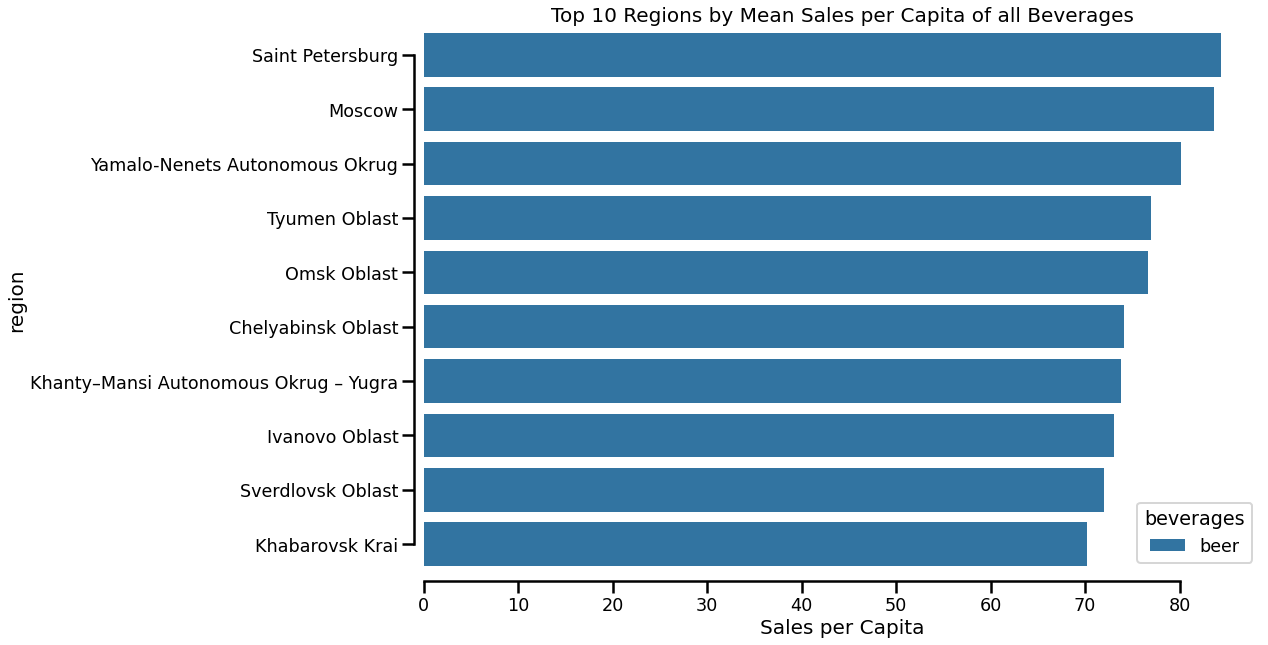

In [32]:
# barplot to rank regions by mean sales of all beverages
funcs.bar_plot(df_clean)

Looking at location sales, Saint Petersburg tops the list, followed by Moscow and Yamalo-Nenets Autonomous Okrug in third. As observed in the time series plot, beer has the most sales by region.

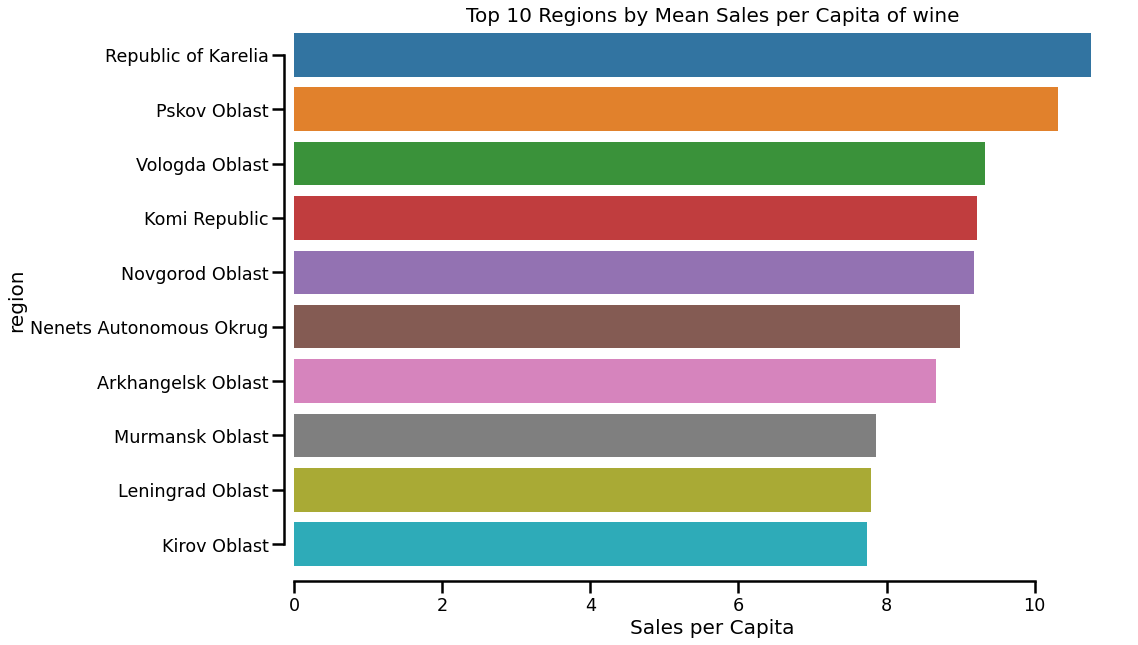

In [25]:
# barplot to rank wine sales for all regions
funcs.bar_plot(df_clean, beverage = 'wine')

For wine-specific regional sales, we can observe that Saint Petersburg is not among the top-selling regions. This revelation could justify why management decided to embark on a wine promotion in Saint Petersburg.

#### Correlation of Features

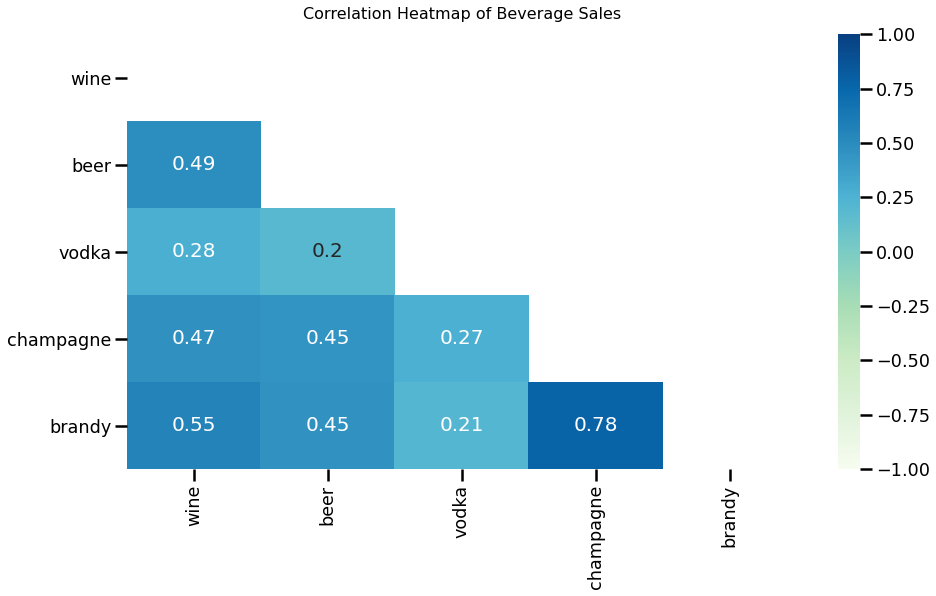

In [33]:
# correlation heatmap
funcs.corr_heatmap(df_clean)

The correlation heatmap shows a strong positive relationship between brandy and champagne sales. This signifies that for every increase in one variable, there's a corresponding increase in sales of the other variable. We can also observe a positive relationship between wine and brandy sales, even though not as strong as the relationship between champagne and brandy.

## Machine Learning

This section will aim to solve the main task of this project. We will use **Collaborative Filtering Method**, an unsupervised machine learning algorithm to recommend regions similar to wine sales in Saint Petersburg. 

**Collaborative Filtering Method** is one of three primary methods to build a Recommender System. This method uses a similarity score to recommend items based on user interactions (Source: [Recommendation System for Streaming Platforms](https://www.datacamp.com/community/tutorials/streaming-platform-analysis)). 

We will implement the following steps to create the recommender system:

- Import machine learning modules
- Preprocess data for machine learning - scale numerical features using MinMaxScaler to have values between 0 and 1.
- Compute similarity score using cosine similarity

We designed the recommender system to recommend regions for not only wine sales in Saint Petersburg and can be used for other regions and a combination of several or all beverages.

Again, we created functions to preprocess the data and make recommendations. We should add that the recommender function is a modified version of **Rounak Banik's**, found in his **Feature Engineering for NLP in Python** course on the **Machine Learning Scientist** path on [DataCamp](https://www.datacamp.com).

In [29]:
# import MinMaxScaler and cosine similarity
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity

The output below shows the 10 regions with wine sales most similar to that in Saint Petersburg.

In [34]:
# recommend 10 regions similar to sale of wine in Saint Petersburg
top_n = funcs.recommend_regions(df_clean, 'Saint Petersburg', 'wine')
top_n

67             Smolensk Oblast
62    Sakha (Yakutia) Republic
36     Nenets Autonomous Okrug
69           Sverdlovsk Oblast
74                 Tver Oblast
3           Arkhangelsk Oblast
37      Nizhny Novgorod Oblast
29            Leningrad Oblast
44                   Perm Krai
65              Saratov Oblast
Name: region, dtype: object

For regions with sales of all alcohol products similar to Saint Petersburg, we can observe almost identical pattern as seen in the ranking of mean sales per capita of all beverages.

In [36]:
# recommend 10 regions similar to sale of all alcoholic beverages in Saint Petersburg
top_n_all_alcohol = funcs.recommend_regions(df_clean, 'Saint Petersburg', 'wine', 'beer', 'vodka', 'champagne', 'brandy')
top_n_all_alcohol

33                                   Moscow
26                         Krasnoyarsk Krai
29                         Leningrad Oblast
69                        Sverdlovsk Oblast
15                       Kaliningrad Oblast
79                         Volgograd Oblast
75                            Tyumen Oblast
21    Khanty–Mansi Autonomous Okrug – Yugra
8                        Chelyabinsk Oblast
44                                Perm Krai
Name: region, dtype: object

## Conclusion

We have successfully used **Collaborative Filtering** method to design a recommender system for regions with similar sales in alcohol. Management can use this tool to rollout promotion of wine sales in the recommended regions and may also employ the tool to analyze performance of regions with similar alcohol sales patterns.